 1. What is the daily overall clickthrough rate? How does it vary between the groups? 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandasql import sqldf

pysqldf = lambda q: sqldf(q, globals())
df = pd.read_csv('events_log.csv')

In [2]:
df['date'] = pd.to_datetime(df['timestamp'], format='%Y%m%d%H%M%S').dt.strftime('%Y-%m-%d')
print(df.head(5))

                               uuid     timestamp        session_id group  \
0  00000736167c507e8ec225bd9e71f9e5  2.016030e+13  78245c2c3fba013a     b   
1  00000c69fe345268935463abbfa5d5b3  2.016031e+13  c559c3be98dca8a4     a   
2  00003bfdab715ee59077a3670331b787  2.016030e+13  760bf89817ce4b08     a   
3  0000465cd7c35ad2bdeafec953e08c1a  2.016030e+13  fb905603d31b2071     a   
4  000050cbb4ef5b42b16c4d2cf69e6358  2.016030e+13  c2bf5e5172a892dc     a   

             action  checkin           page_id  n_results  result_position  \
0  searchResultPage      NaN  cbeb66d1bc1f1bc2        5.0              NaN   
1  searchResultPage      NaN  eb658e8722aad674       10.0              NaN   
2           checkin     30.0  f99a9fc1f7fdd21e        NaN              NaN   
3           checkin     60.0  e5626962a6939a75        NaN             10.0   
4           checkin     30.0  787dd6a4c371cbf9        NaN              NaN   

         date  
0  2016-03-01  
1  2016-03-07  
2  2016-03-02  
3  2

**Daily overall clickthrough rate**

In [3]:
df_visit = df[df['action'] == 'visitPage'].groupby('date').agg(cnt_visitpage = ('date', 'count'))
df_search = df[df['action'] == 'searchResultPage'].groupby('date').agg(cnt_search = ('date', 'count'))
df_concat = pd.concat([df_visit, df_search], axis=1, sort=False)
df_concat['ctr'] = (df_concat['cnt_visitpage']/df_concat['cnt_search'] )*100
print(df_concat)


            cnt_visitpage  cnt_search        ctr
date                                            
2016-03-01           6654       18374  36.214216
2016-03-02           6692       18902  35.403661
2016-03-03           6574       19159  34.312856
2016-03-04           4294       16675  25.751124
2016-03-05           3323       13204  25.166616
2016-03-06           3758       14612  25.718587
2016-03-07           4714       19011  24.796171
2016-03-08           4098       16297  25.145732


                  ctr
date                 
2016-03-01  36.214216
2016-03-02  35.403661
2016-03-03  34.312856
2016-03-04  25.751124
2016-03-05  25.166616
2016-03-06  25.718587
2016-03-07  24.796171
2016-03-08  25.145732


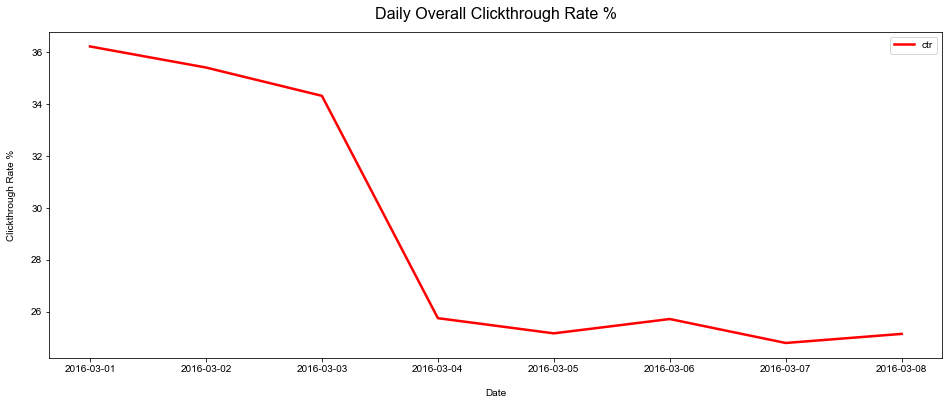

In [4]:
df_new= df_concat.filter(['date','ctr'], axis=1)
print(df_new)
df_new.plot(figsize=(16, 6), linewidth=2.5, color='red')
sns.set(font_scale=1.4)
plt.xlabel("Date", labelpad=15)
plt.ylabel("Clickthrough Rate %", labelpad=15)
plt.title("Daily Overall Clickthrough Rate %", y=1.02, fontsize=16);

**How does it vary between the groups?**

In [5]:
df_visit_a = df[(df['action'] == 'visitPage') & (df['group']=='a')]\
                    .groupby('date') \
                    .agg(cnt_visit_a = ('date','count'))
df_visit_b = df[(df['action'] == 'visitPage') & (df['group']=='b')] \
                    .groupby('date')\
                    .agg(cnt_visit_b = ('date', 'count'))
df_search_a = df[(df['action'] == 'searchResultPage') & (df['group']=='a')] \
                    .groupby('date')\
                    .agg(cnt_search_a = ('date', 'count'))
df_search_b = df[(df['action'] == 'searchResultPage') & (df['group']=='b')]\
                    .groupby('date')\
                    .agg(cnt_search_b = ('date', 'count'))

df_concat_all = pd.concat([df_visit_a, df_visit_b,df_search_a,df_search_b], axis=1, sort=False)
df_concat_all['ctr_a'] = (df_concat_all['cnt_visit_a']/df_concat_all['cnt_search_a'] )*100
df_concat_all['ctr_b'] = (df_concat_all['cnt_visit_b']/df_concat_all['cnt_search_b'] )*100

print(df_concat_all)

            cnt_visit_a  cnt_visit_b  cnt_search_a  cnt_search_b      ctr_a  \
date                                                                          
2016-03-01         5925          729         12582          5792  47.091082   
2016-03-02         5932          760         13209          5693  44.908774   
2016-03-03         5775          799         13280          5879  43.486446   
2016-03-04         3381          913         11298          5377  29.925651   
2016-03-05         2513          810          8612          4592  29.180214   
2016-03-06         2901          857          9469          5143  30.636815   
2016-03-07         3610         1104         12699          6312  28.427435   
2016-03-08         3228          870         10907          5390  29.595673   

                ctr_b  
date                   
2016-03-01  12.586326  
2016-03-02  13.349728  
2016-03-03  13.590747  
2016-03-04  16.979728  
2016-03-05  17.639373  
2016-03-06  16.663426  
2016-03-07  17.49

                ctr_a      ctr_b
date                            
2016-03-01  47.091082  12.586326
2016-03-02  44.908774  13.349728
2016-03-03  43.486446  13.590747
2016-03-04  29.925651  16.979728
2016-03-05  29.180214  17.639373
2016-03-06  30.636815  16.663426
2016-03-07  28.427435  17.490494
2016-03-08  29.595673  16.141002


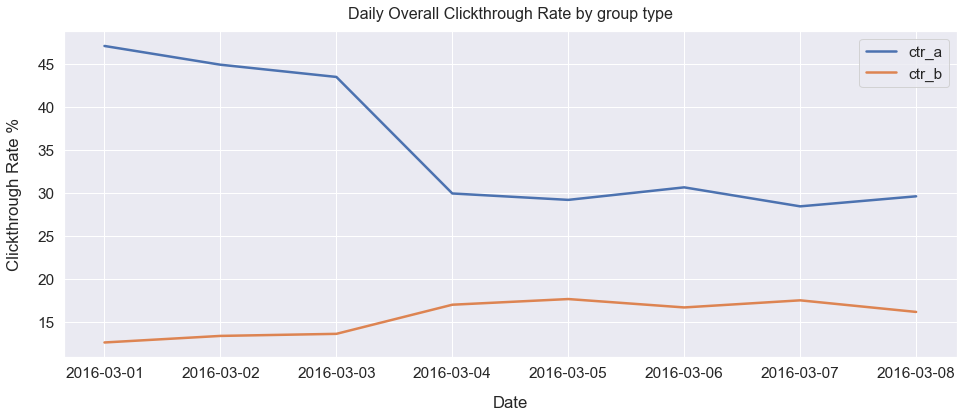

In [6]:
df_plot_ab = df_concat_all.filter(['date','ctr_a', 'ctr_b'], axis=1)
print(df_plot_ab)
df_plot_ab.plot(figsize=(16, 6), linewidth=2.5)
sns.set(font_scale=1.4)
plt.xlabel("Date", labelpad=15)
plt.ylabel("Clickthrough Rate %", labelpad=15)
plt.title("Daily Overall Clickthrough Rate by group type", y=1.02, fontsize=16);

 **2. Which results do people tend to try first?**

In [7]:
df['date'] = pd.to_datetime(df['timestamp'], format='%Y%m%d%H%M%S').dt.strftime('%Y-%m-%d')

In [8]:
#Which results do people tend to try first? 
# Sort the results based on the result_position 
df2 = df.filter(['result_position'], axis=1)
#print(df2.head())
df_res_pos= df2[df2['result_position'].notnull()] \
                .groupby('result_position')        \
                .agg(cnt_result =('result_position','count')) \
                .sort_values(by=['cnt_result'], ascending=False)
print(df_res_pos.head(3))

#They tend to try the result from the first position

                 cnt_result
result_position            
1.0                  149354
2.0                   31779
3.0                   16234


**How does it change day-to-day?**

In [9]:
df_by_day = df.filter(['date','result_position'], axis=1)
df_by_day= df_by_day[df_by_day['result_position'].notnull()]

df_by_day = df_by_day\
                .groupby(['date','result_position'])\
                .agg(cnt_result =('result_position','count'))\
                .sort_values(by=['cnt_result'], ascending=False)
df_by_day.reset_index()               
df_by_day['row_number'] = df_by_day.groupby(['date']).cumcount()
df_by_day = df_by_day[df_by_day['row_number'] == 0]
print(df_by_day)

                            cnt_result  row_number
date       result_position                        
2016-03-07 1.0                   21392           0
2016-03-03 1.0                   20508           0
2016-03-02 1.0                   19535           0
2016-03-04 1.0                   19230           0
2016-03-01 1.0                   18880           0
2016-03-08 1.0                   18025           0
2016-03-06 1.0                   17004           0
2016-03-05 1.0                   14780           0


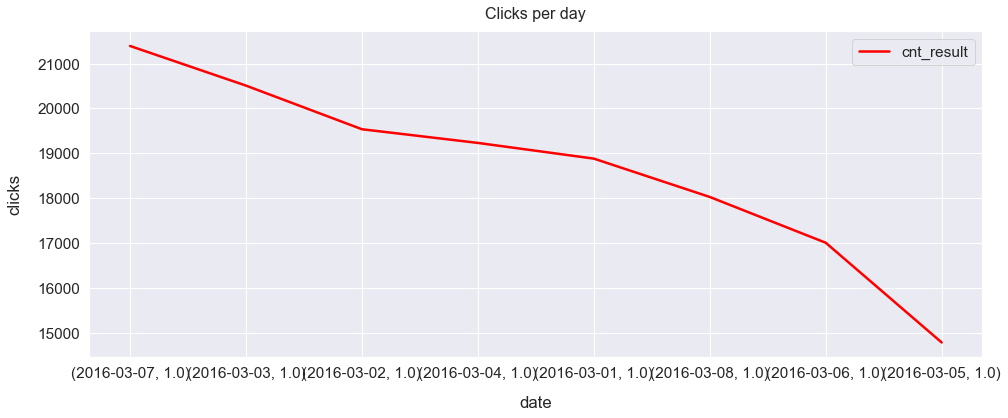

In [10]:
df_by_day = df_by_day.filter(['date','cnt_result'])
df_new= df_by_day.filter(['date','cnt_result'], axis=1)
df_new.plot(figsize=(16, 6), linewidth=2.5, color='red')
sns.set(font_scale=1.4)

plt.xlabel("date", labelpad=15)
plt.ylabel("clicks", labelpad=15)
plt.title("Clicks per day", y=1.02, fontsize=16);


**3. What is the daily overall zero results rate?**

In [11]:
df_zero_results = df[(df['action'] == 'searchResultPage') & (df['n_results'] == 0)]\
                                    .groupby('date')\
                                    .agg(cnt_zero_result = ('date', 'count'))
df_all_search = df[df['action'] == 'searchResultPage']\
                                    .groupby('date')\
                                    .agg(cnt_all_search = ('date', 'count'))
df_concat = pd.concat([df_zero_results, df_all_search], axis=1, sort=False)
df_concat['conversion_rate'] = (df_concat['cnt_zero_result']/df_concat['cnt_all_search'] )*100
print(df_concat)

            cnt_zero_result  cnt_all_search  conversion_rate
date                                                        
2016-03-01             3447           18374        18.760205
2016-03-02             3589           18902        18.987409
2016-03-03             3443           19159        17.970667
2016-03-04             3015           16675        18.080960
2016-03-05             2442           13204        18.494396
2016-03-06             2574           14612        17.615658
2016-03-07             3460           19011        18.199989
2016-03-08             3157           16297        19.371663


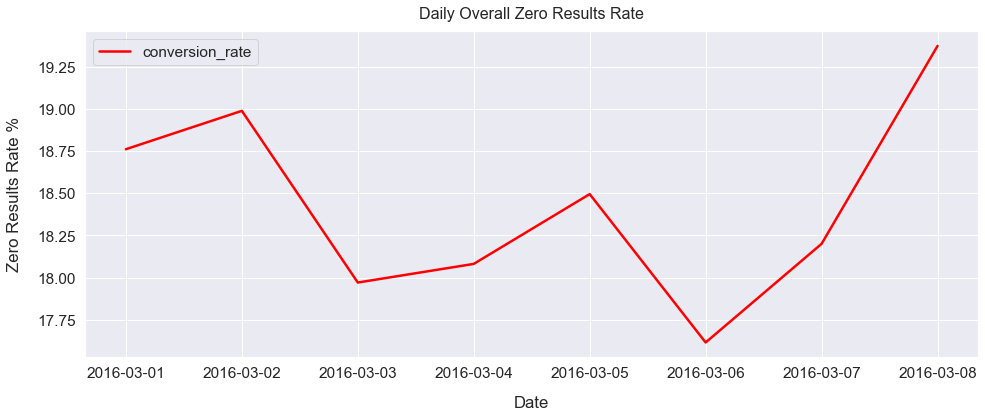

In [12]:
df_new= df_concat.filter(['date','conversion_rate'], axis=1)
df_new.plot(figsize=(16, 6), linewidth=2.5, color='red')
sns.set(font_scale=1.4)
plt.xlabel("Date", labelpad=15)
plt.ylabel("Zero Results Rate %", labelpad=15)
plt.title("Daily Overall Zero Results Rate", y=1.02, fontsize=16);

**How does it vary between the groups?**

In [13]:
df_zero_results_a = df[(df['action'] == 'searchResultPage') & (df['n_results'] == 0) & (df['group']=='a')]\
                        .groupby('date') \
                        .agg(cnt_zero_results_a = ('date','count'))
df_zero_results_b = df[(df['action'] == 'searchResultPage') & (df['n_results'] == 0) & (df['group']=='b')] \
                        .groupby('date')\
                        .agg(cnt_zero_results_b = ('date', 'count'))
df_search_a = df[(df['action'] == 'searchResultPage') & (df['group']=='a')] \
                        .groupby('date')\
                        .agg(cnt_search_a = ('date', 'count'))
df_search_b = df[(df['action'] == 'searchResultPage') & (df['group']=='b')]\
                        .groupby('date')\
                        .agg(cnt_search_b = ('date', 'count'))

df_concat_all = pd.concat([df_zero_results_a, df_zero_results_b,df_search_a,df_search_b], axis=1, sort=False)
df_concat_all['conversion_rate_group_a'] = (df_concat_all['cnt_zero_results_a']/df_concat_all['cnt_search_a'] )*100
df_concat_all['conversion_rate_group_b'] = (df_concat_all['cnt_zero_results_b']/df_concat_all['cnt_search_b'] )*100

print(df_concat_all)

            cnt_zero_results_a  cnt_zero_results_b  cnt_search_a  \
date                                                               
2016-03-01                2350                1097         12582   
2016-03-02                2524                1065         13209   
2016-03-03                2371                1072         13280   
2016-03-04                2068                 947         11298   
2016-03-05                1535                 907          8612   
2016-03-06                1599                 975          9469   
2016-03-07                2316                1144         12699   
2016-03-08                2139                1018         10907   

            cnt_search_b  conversion_rate_group_a  conversion_rate_group_b  
date                                                                        
2016-03-01          5792                18.677476                18.939917  
2016-03-02          5693                19.108184                18.707184  
2016-03-03 

            conversion_rate_group_a  conversion_rate_group_b
date                                                        
2016-03-01                18.677476                18.939917
2016-03-02                19.108184                18.707184
2016-03-03                17.853916                18.234394
2016-03-04                18.304125                17.612051
2016-03-05                17.823967                19.751742
2016-03-06                16.886683                18.957807
2016-03-07                18.237657                18.124208
2016-03-08                19.611259                18.886827


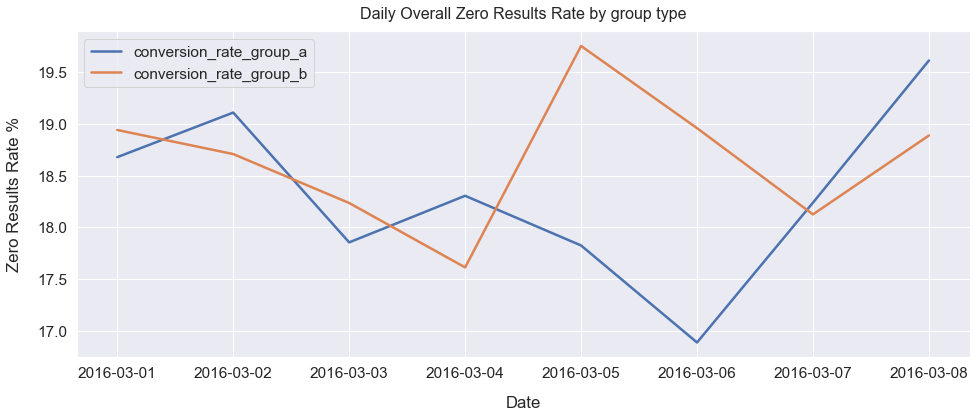

In [14]:
df_plot_ab = df_concat_all.filter(['date','conversion_rate_group_a', 'conversion_rate_group_b'], axis=1)
print(df_plot_ab)
df_plot_ab.plot(figsize=(16, 6), linewidth=2.5)
sns.set(font_scale=1.4)
plt.xlabel("Date", labelpad=15)
plt.ylabel("Zero Results Rate %", labelpad=15)
plt.title("Daily Overall Zero Results Rate by group type", y=1.02, fontsize=16);


**4. Let *session length* be approximately the time between the first event and the last event in a session. Choose a variable from the dataset and describe its relationship to session length. Visualize the relationship.**

In [15]:
#show the sessions average length for the group a and group b

In [16]:
df4 = pd.read_csv('events_log.csv')
df4['date'] = pd.to_datetime(df4['timestamp'], format='%Y%m%d%H%M%S').dt.strftime('%Y-%m-%d')

In [17]:
df4 = df4.filter(['date','session_id','group','action','checkin'], axis=1)
print(df4.head())

         date        session_id group            action  checkin
0  2016-03-01  78245c2c3fba013a     b  searchResultPage      NaN
1  2016-03-07  c559c3be98dca8a4     a  searchResultPage      NaN
2  2016-03-02  760bf89817ce4b08     a           checkin     30.0
3  2016-03-02  fb905603d31b2071     a           checkin     60.0
4  2016-03-02  c2bf5e5172a892dc     a           checkin     30.0


In [18]:
df4 = df4[df4['action'] == 'checkin']
print(df4.head())

         date        session_id group   action  checkin
2  2016-03-02  760bf89817ce4b08     a  checkin     30.0
3  2016-03-02  fb905603d31b2071     a  checkin     60.0
4  2016-03-02  c2bf5e5172a892dc     a  checkin     30.0
5  2016-03-02  f6840a9614c527ad     a  checkin    180.0
6  2016-03-01  51f4d3b6a8688e56     a  checkin    240.0


In [19]:
df4_new = df4.groupby(['session_id','group'])\
         .agg(mean_session = ('checkin', 'mean'),\
              max_session = ('checkin','max'))
                             
print(df4_new)

                        mean_session  max_session
session_id       group                           
0001382e027b2ea4 b        115.384615        300.0
0001e8bb90445cb2 b        152.000000        420.0
00064fe774048046 a         10.000000         10.0
0007b7f6b575feb6 a         97.500000        300.0
000b72561100b509 b        152.000000        420.0
...                              ...          ...
fff73365ad380bc7 a         28.750000         60.0
fffa1d5e2c608ba6 a         25.000000         40.0
fffa88acebf831c8 a        103.500000        360.0
fffb978cc690214c b         63.333333        150.0
ffff9adcd8f302d6 a         35.000000         60.0

[23295 rows x 2 columns]


In [20]:
df4_new = df4_new.groupby(['group'])\
         .agg(mean_session = ('mean_session', 'mean'),\
              max_session = ('max_session','max'))
                             
print(df4_new)

       mean_session  max_session
group                           
a         65.437393        420.0
b         76.966762        420.0


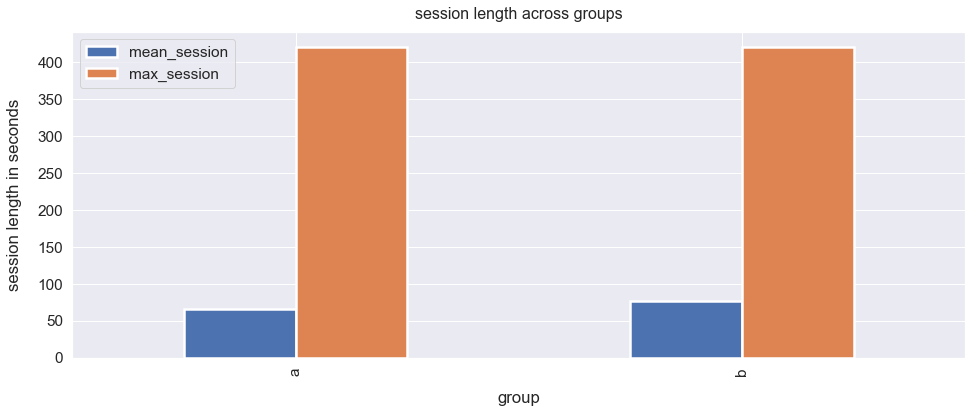

In [21]:
df_plot_ab = df4_new.filter(['group','mean_session','max_session'], axis=1)
df_plot_ab.plot.bar(figsize=(16, 6), linewidth=2.5)
sns.set(font_scale=1.4)

plt.xlabel("group", labelpad=15)
plt.ylabel("session length in seconds", labelpad=15)
plt.title("session length across groups", y=1.02, fontsize=16);


**5. Summarize your findings in an executive summary**

1. What is the daily overall clickthrough rate? How does it vary between the groups?

    * Daily Overall Clickthrough Rate is decreasing during that week of March
    * Group A rates are much higher than the Group B rates
    * Group B rates tend to increase when the Group A rates are decreasing and vice versa
    
    
2. Which results do people tend to try first? How does it change day-to-day?

    * People tend to try first the first result in the searchpage
    * The result does not change on a day-to-day basis
    
    
3. What is the daily overall zero results rate? How does it vary between the groups?

    * Approximately 18% of the search show up with zero results
    * For Group A the rates are between 16.8% and 19.6%
    * For Group B the rates are between 17.6% and 19.7%
    * The rates tend to increase for one group when the rate are decreasing for the other group
    
    
4. Let *session length* be approximately the time between the first event and the last event in a session. Choose a variable from the dataset and describe its relationship to session length. Visualize the relationship.

    * Both groups have a maximum session length of 7 min
    * People from group b tend to have longer sessions
